In [1]:
import sys
import numpy             as     np
import pylab             as     pl
import astropy.io.fits   as     fits

from   astropy.table     import Table, join, unique
from   matplotlib.pyplot import figure

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [3]:
from   schechter         import schechter
from   SV3.define_sample import define_sample
from   ajs_kcorr         import ajs_kcorr
from   mxxl_ecorr        import mxxl_ecorr
from   ref_gmr           import ajs_reference_gmr
from   params            import params
from   zlimits           import zmin, zmax
from   ddps              import set_ddps
from   vmax              import vmax
from   distances         import dist_mod
from   scipy             import stats

In [4]:
version = 0.6

In [5]:
bright_merge_obs = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/MXXL/bright_v{:.1f}.fits'.format(version))
bright_merge_obs

MOCKRA,MOCKDEC,Z,ZOBS,MRH,RMAG_DRED,REFGMR0P1,GTYPE,HMASS,NMOCK,RA,DEC,TARGETID
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64
70.3273696899414,25.89268684387207,0.12769781053066254,0.1271754950284958,-19.007604598999023,19.0389404296875,0.7329427003860474,0.0,24.694326400756836,4,151.05778431871462,2.3529754106175886,0
68.56790924072266,25.862361907958984,0.13574250042438507,0.13657332956790924,-20.306686401367188,17.900495529174805,0.86435866355896,0.0,75.93505096435547,4,149.48766725657433,2.1398708806658533,1
80.89179992675781,26.706283569335938,0.33277422189712524,0.3358469009399414,-21.43029022216797,19.260910034179688,0.905381441116333,0.0,376.99798583984375,3,151.45973775436238,3.222913875547519,2
81.11534881591797,26.14855194091797,0.22037920355796814,0.22072993218898773,-20.052936553955078,19.431758880615234,0.8909478187561035,0.0,52.295162200927734,3,151.72919659282448,2.6949696711554765,3
78.56082916259766,24.647912979125977,0.11645698547363281,0.11806387454271317,-19.001338958740234,18.81563377380371,0.6731806397438049,0.0,25.76713752746582,3,149.61420930044986,0.9320106194848705,4
78.57237243652344,24.67148780822754,0.11663307249546051,0.11768244951963425,-21.514705657958984,16.31368064880371,0.9457125663757324,0.0,366.99139404296875,3,149.62205916724903,0.9565915167126775,5
78.15650939941406,25.19784164428711,0.0684894323348999,0.06795936077833176,-19.52063751220703,17.037307739257812,0.4790876507759094,0.0,39.510921478271484,3,149.19023150375648,1.4391456959625657,6
70.76897430419922,26.040807723999023,0.2862575054168701,0.2878228724002838,-21.3984317779541,18.863229751586914,0.9986308217048645,0.0,380.79949951171875,4,151.43387107002738,2.548896348870784,7
80.83235168457031,26.091585159301758,0.27930906414985657,0.27769073843955994,-21.707773208618164,18.49768829345703,1.0659780502319336,0.0,390.31024169921875,3,151.4840594038347,2.606391747377657,8


In [7]:
derived = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/MXXL/bright_derived_v{:.1f}.fits'.format(version))
derived

INSAMPLE,DISTMOD_ZMAX,VOLUME,MRH,RKCORR_ZMAX,GMR_DRED,ZMAX,IVMAX,TARGETID
float64,float64,float64,float64,float64,float64,float64,float64,int64
1.0,38.74975081664155,217990902.08354196,-18.940451420309987,-0.3092993963323044,0.7851226649536978,0.1662245761883875,2.130137180658368e-09,0
1.0,39.97840012762796,260547331.44212127,-20.206150331376445,-0.2722497962492278,0.9499806046821548,0.27418459592056554,5.088249404018372e-10,1
1.0,40.673056601425515,3378790542.91604,-21.005780557088976,-0.1672760443365336,1.5396057878560652,0.3604918933118081,2.3722765531417097e-10,2
1.0,39.500557247675985,1056965394.7441212,-19.707264046683466,-0.29329320099256884,1.2251826333452884,0.22625257022835704,8.776409466246544e-10,3
1.0,38.79501409614568,166483138.17664474,-18.96553932421136,-0.3294747719343448,0.7004823659563815,0.16937964806487368,2.01729599033423e-09,4
1.0,41.027158469054356,167221516.1410428,-21.47851499613974,-0.04864347291461185,0.9889192613594187,0.41342980222013287,1.6309440017180503e-10,5
1.0,39.497676453664084,34853967.59552382,-19.570100471047827,-0.4275759826157516,0.4490770435909397,0.22598843160518045,8.805716076609073e-10,6
1.0,40.638440551930515,2218725532.7181735,-21.006491176158807,-0.13194937577170368,1.548441562054832,0.3556643153977302,2.46208796327523e-10,7
1.0,40.86807611702271,2070555846.9612384,-21.320698718957747,-0.04737739806494762,1.6060591894530716,0.38882559028170494,1.9275642385747646e-10,8


In [8]:
isin = derived['INSAMPLE'].astype(bool)

print(np.mean(isin))

1.0


In [9]:
derived = derived[isin]
bright_merge_obs = bright_merge_obs[isin]

In [10]:
len(derived), len(bright_merge_obs)

(580649, 580649)

In [11]:
joined = join(derived, unique(bright_merge_obs['TARGETID', 'RMAG_DRED', 'Z', 'RA', 'DEC', 'REFGMR0P1'], keys='TARGETID', keep='first'), join_type='left', keys='TARGETID')

In [12]:
print(len(derived), len(bright_merge_obs), len(joined))

580649 580649 580649


Text(0.5, 0, 'Ref. $(g-r)$ @ $z=$0.1')

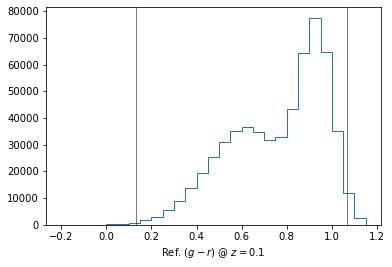

In [14]:
_ = pl.hist(bright_merge_obs['REFGMR0P1'], histtype='step', bins=np.arange(-0.2, 1.2, 0.05))

pl.axvline(0.131, c='k', lw=.5)
pl.axvline(1.067, c='k', lw=.5)

pl.xlabel('Ref. $(g-r)$ @ $z=$0.1')

In [15]:
joined['RMAG_IDX'] = np.digitize(joined['MRH'], bins=np.arange(-23.0, -11.0, 1.))

In [16]:
np.unique(joined['RMAG_IDX'].data, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([     7,   6280, 105184, 224460, 164571,  55000,  16876,   5532,
          1876,    650,    165,     48]))

Text(0, 0.5, "Counts per $\\Delta V' = 0.05$")

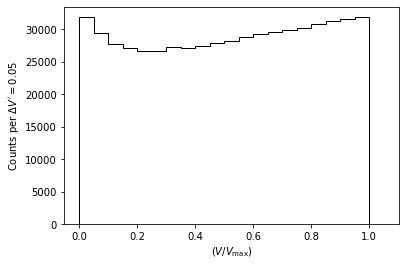

In [17]:
dV = 0.05
_  = pl.hist(derived['VOLUME'] * derived['IVMAX'], bins=np.arange(0.0, 1.1, dV), histtype='step', color='k')

pl.xlabel(r'$(V / V_{\rm max})$')
pl.ylabel('Counts per $\Delta V\' = {:.2f}$'.format(dV))

Text(0, 0.5, "Counts per $\\Delta V' = 0.05$")

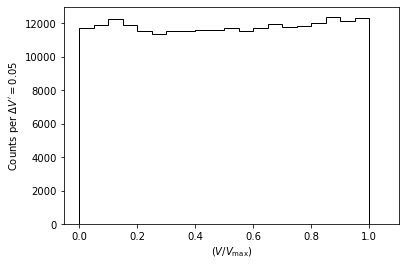

In [18]:
isin = (derived['MRH'] > -20.) & (derived['MRH'] < -17.)

dV   = 0.05
_    = pl.hist(derived['VOLUME'][isin] * derived['IVMAX'][isin], bins=np.arange(0.0, 1.1, dV), histtype='step', color='k')

pl.xlabel(r'$(V / V_{\rm max})$')
pl.ylabel('Counts per $\Delta V\' = {:.2f}$'.format(dV))

In [19]:
np.unique(joined['RMAG_IDX'].data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [20]:
lims = set_ddps(joined)

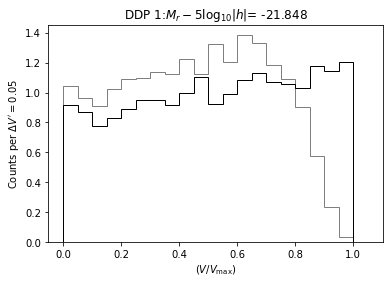

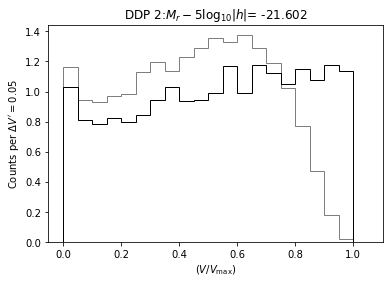

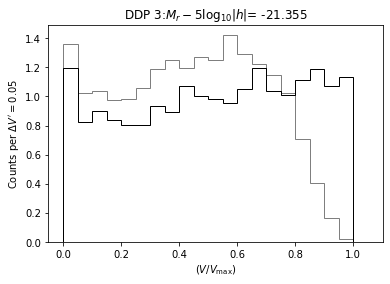

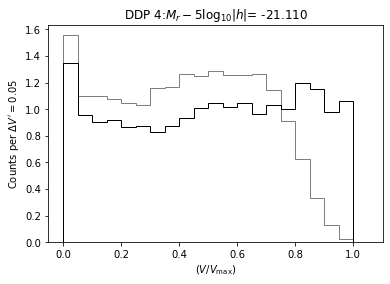

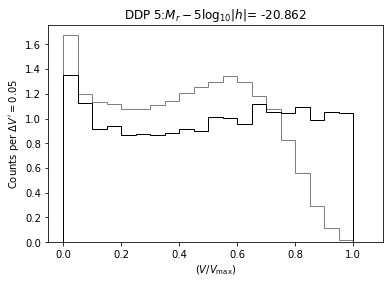

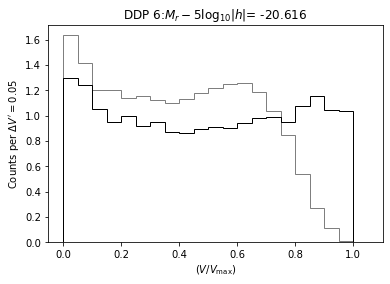

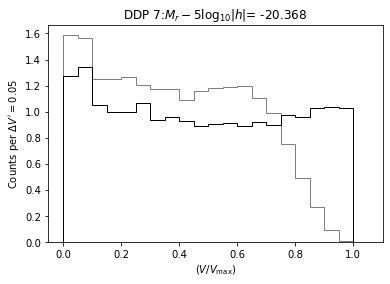

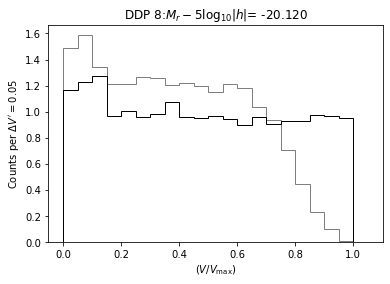

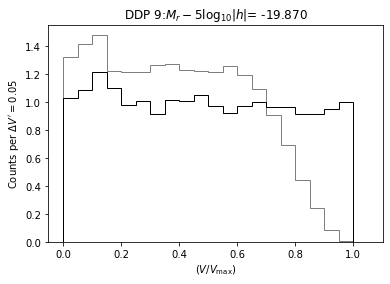

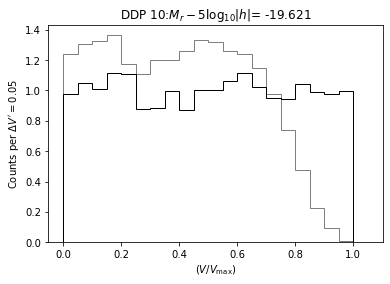

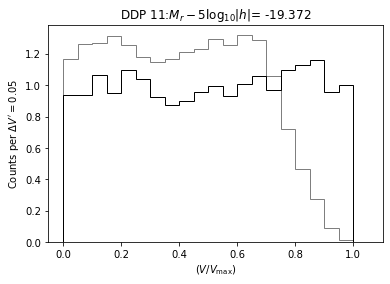

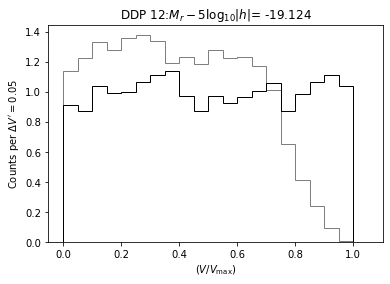

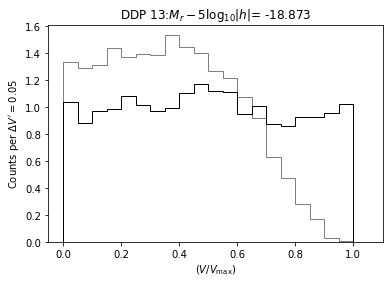

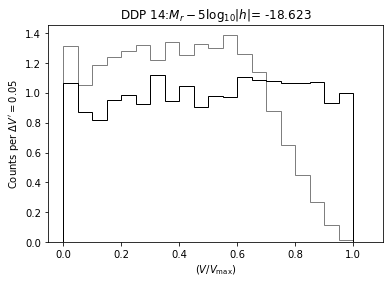

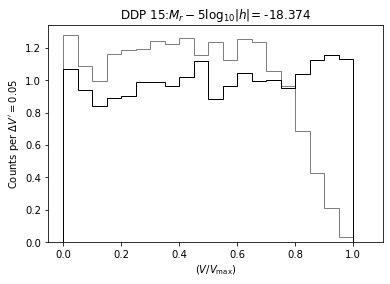

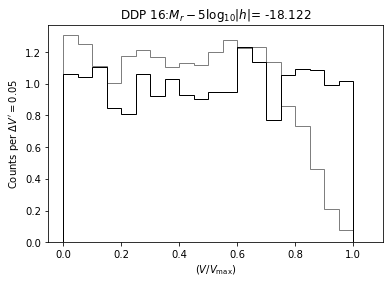

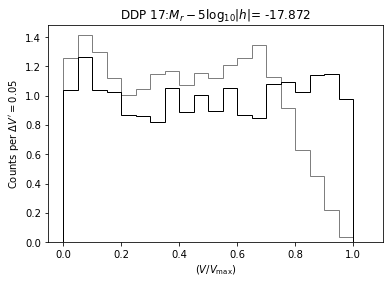

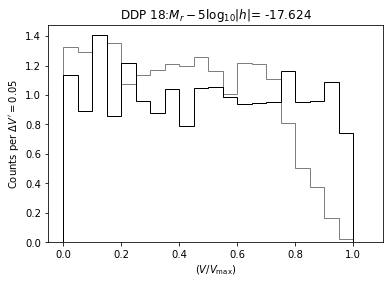

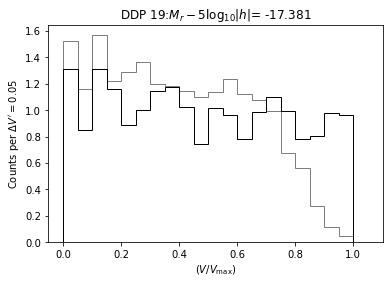

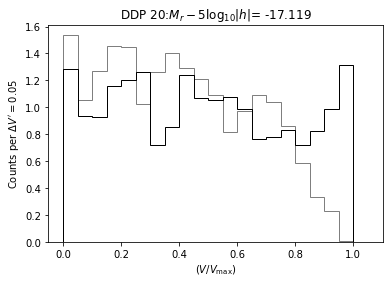

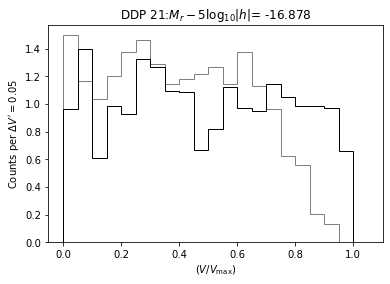

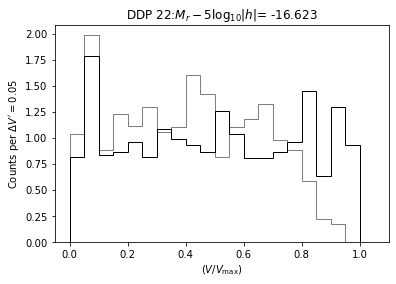

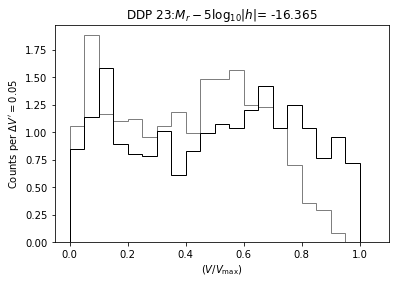

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


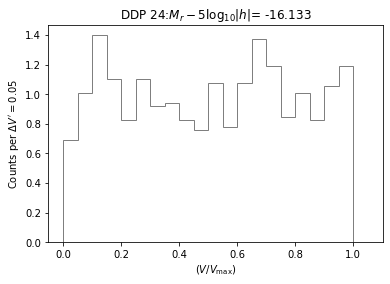

In [21]:
dV = 0.05

for idx in np.unique(joined['DDPS']):
    if idx == -1:
        continue
    
    sample  = joined[joined['DDPS'] == idx]

    _       = pl.hist(sample['VOLUME'] * sample['IVMAX'], bins=np.arange(0.0, 1.1, dV), histtype='step', density=True, color='k', alpha=0.5)
    
    to_fix  = sample['ZMAX'].data > sample['DDPZMAX'].data
    
    sample['IVMAX'][to_fix] = 1. / vmax(None, None, None, None, None, fsky=1.0, max_z=sample['DDPZMAX'].data[0])
    
    _       = pl.hist(sample['VOLUME'] * sample['IVMAX'], bins=np.arange(0.0, 1.1, dV), histtype='step', density=True, color='k', alpha=1.0)
    
    med_mrh = np.median(sample['MRH'].data)
    
    title   = r'DDP {:d}:'.format(idx) + '$M_r - 5 \log_{10}|h|$' + '= {:.3f}'.format(med_mrh)
    
    pl.xlabel(r'$(V / V_{\rm max})$')
    pl.ylabel('Counts per $\Delta V\' = {:.2f}$'.format(dV))

    pl.title(title)
        
    pl.show()

# Done.